In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#function 데코레이터를 토해 파이썬 함수를 텐서플로 그래프 코드로 자동 변환할 수 있음
@tf.function
def compute_z(a, b, c):
  r1 = tf.subtract(a,b)
  r2 = tf.multiply(2, r1)
  z = tf.add(r2, c)
  return z

In [ ]:
tf.print(compute_z(1,2,3))
tf.print(compute_z([[1,2],[3,4]], [[5,6], [7,8]], [[9,10], [11,12]]))

1
[[1 2]
 [3 4]]


In [ ]:
#can restrict type of input by TensorSpec

@tf.function(input_signature = (tf.TensorSpec(shape=[None], dtype=tf.int32), tf.TensorSpec(shape=None, dtype=tf.int32), tf.TensorSpec(shape=None, dtype=tf.int32)))
def compute_z(a, b, c):
  r1 = tf.subtract(a, b)
  r2 = tf.multiply(2, r1)
  z = tf.add(r2, c)
  return z

In [ ]:
#initial_value 값을 설정해야 함. 또한 변수는 trainable 속성을 갖고, default=True임, 변수는 assign(), .assign_add() 메소드를 통해 수정할 수 있음
a = tf.Variable(initial_value=3, name='var_a')
b = tf.Variable(initial_value=[1,2,3], name='var_b')

In [ ]:
init = tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,)))

[0.273321927 -0.0220571626 0.474863708]


In [ ]:
v = tf.Variable(init(shape=(2,3)))
tf.print(v)

[[0.964408 1.27687752 0.930986226]
 [-0.963418245 -0.020860048 -0.723852694]]


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.build(input_shape=(None,4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                80        
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for v in model.variables:
  print('{:20s}'.format(v.name), v.trainable, v.shape)

dense_1/kernel:0     True (4, 16)
dense_1/bias:0       True (16,)
dense_2/kernel:0     True (16, 32)
dense_2/bias:0       True (32,)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu, kernel_initializer=tf.keras.initializers.glorot_uniform(), bias_initializer=tf.keras.initializers.Constant(2.0)))

In [ ]:
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.sigmoid, kernel_regularizer=tf.keras.regularizers.l1))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision()])

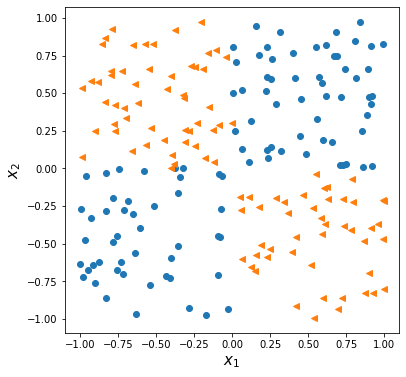

In [ ]:
#solving classyfing xor problem

x = np.random.uniform(low=-1, high=1, size=(200,2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]>0] = 0
x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]
fig = plt.figure(figsize=(6,6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o')
plt.plot(x[y==1, 0], x[y==1, 1], '<')
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


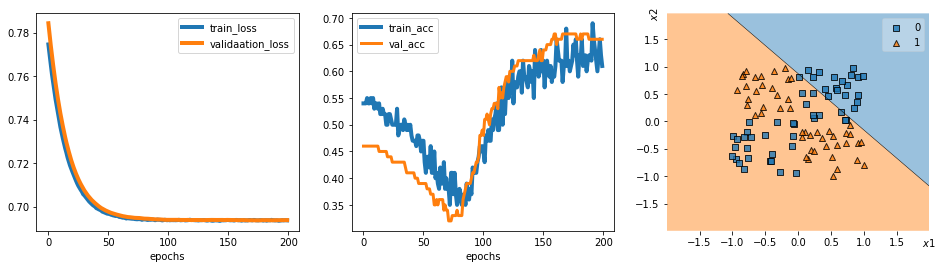

In [ ]:
from mlxtend.plotting import plot_decision_regions

history = hist.history
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['train_loss', 'validation_loss'])
ax.set_xlabel('epochs')
ax = fig.add_subplot(1,3,2)
plt.plot(history['accuracy'], lw=4)
plt.plot(history['val_accuracy'], lw=3)
plt.legend(['train_acc', 'val_acc'])
ax.set_xlabel('epochs')
ax=fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
ax.set_xlabel(r'$x1$')
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x2$')
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


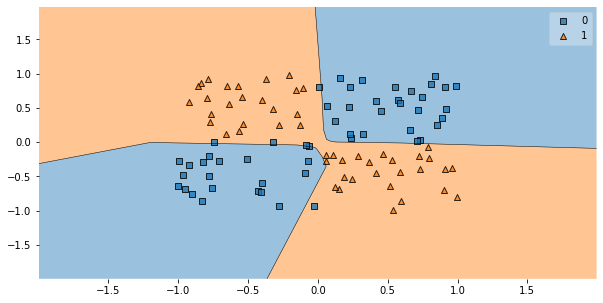

In [ ]:
fig = plt.figure(figsize=(10,5))
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
plt.show()

In [ ]:
inputs = tf.keras.Input(shape=(2,))
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_21 (Dense)            (None, 4)                 12        
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [3]:
import pandas as pd
data_path = tf.keras.utils.get_file("auto-mpg.data", ("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"))
columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'ModelYear', 'Origin']
df = pd.read_csv(data_path, names=columns, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

40960/30286 [========================================] - 0s 2us/step


In [6]:
#na를 포함한 열 삭제
df = df.dropna()
df = df.reset_index(drop=True)

import sklearn
import sklearn.model_selection
df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8)
train_stats = df_train.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.340895,7.968000,9.0,17.0,22.4,29.0,46.6
Cylinders,313.0,5.517572,1.707969,3.0,4.0,5.0,8.0,8.0
Displacement,313.0,196.384984,105.279647,68.0,105.0,151.0,302.0,455.0
Horsepower,313.0,104.827476,38.661859,46.0,75.0,95.0,129.0,225.0
Weight,313.0,2992.028754,860.903745,1613.0,2220.0,2865.0,3613.0,4997.0
Acceleration,313.0,15.509585,2.705355,8.0,13.6,15.4,17.0,24.6
ModelYear,313.0,75.907348,3.633142,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.568690,0.798181,1.0,1.0,1.0,2.0,3.0


In [7]:
numeric_columns=['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for col in numeric_columns:
  mean = train_stats['mean'][col]
  std = train_stats['std'][col]
  df_train_norm[col] = (df_train_norm[col]-mean)/std
  df_test_norm[col] = (df_test_norm[col]-mean)/std

df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
222,15.0,1.453439,1.003186,0.651094,1.513492,-0.225325,77,1
46,19.0,0.282457,0.509263,-0.124864,0.336822,-0.188361,71,1
238,30.5,-0.888524,-0.944009,-0.693900,-0.931613,-0.521035,77,2
8,14.0,1.453439,2.456458,3.108297,1.664496,-2.036548,70,1
331,23.7,-1.474015,-1.200469,-0.124864,-0.664451,-1.112455,80,3


In [9]:
numeric_features=[]
for col in numeric_columns:
  numeric_features.append(tf.feature_column.numeric_column(key=col))

numeric_features

[NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Displacement', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Horsepower', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Acceleration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [10]:
feature_year = tf.feature_column.numeric_column(key='ModelYear')
bucketized_features=[]
bucketized_features.append(tf.feature_column.bucketized_column(source_column=feature_year, boundaries=[73,76,79]))

In [11]:
feature_origin = tf.feature_column.categorical_column_with_vocabulary_list(key='Origin', vocabulary_list=[1,2,3])

In [12]:
#범주형 특성을 밀집 열로 바꾸는 방법은 임베딩(embedding_columns)와 인디케이터(indicator_columns)가 있음
#임베딩은 특성을 float타입의 랜덤한 벡터로 매핑하고, 인디케이터는 원핫 인코딩을 함
categorical_indicator_features = []
categorical_indicator_features.append(tf.feature_column.indicator_column(feature_origin))

In [16]:
def train_input_fn(df_train, batch_size=8):
  df = df_train.copy()
  train_x, train_y = df, df.pop('MPG')
  dataset = tf.data.Dataset.from_tensor_slices((dict(train_x), train_y))

  return dataset.shuffle(1000).repeat().batch(batch_size)

In [17]:
ds = train_input_fn(df_train_norm)
batch = next(iter(ds))
batch

({'Acceleration': <tf.Tensor: shape=(8,), dtype=float64, numpy=
  array([ 1.10536887,  1.10536887,  0.36609439,  0.51394929, -0.00354285,
          2.02946197, -0.55799871, -1.29727319])>,
  'Cylinders': <tf.Tensor: shape=(8,), dtype=float64, numpy=
  array([-0.88852424,  0.28245718, -0.88852424, -0.88852424, -0.88852424,
          0.28245718, -0.88852424,  1.4534386 ])>,
  'Displacement': <tf.Tensor: shape=(8,), dtype=float64, numpy=
  array([-0.93451096,  0.50926288, -0.93451096, -0.76353774, -1.01049906,
          0.50926288, -0.70654667,  1.93403969])>,
  'Horsepower': <tf.Tensor: shape=(8,), dtype=float64, numpy=
  array([-0.95255315,  0.00446238, -0.56457388, -0.61630445, -0.77149616,
         -0.69390031, -0.48697803,  1.68570589])>,
  'ModelYear': <tf.Tensor: shape=(8,), dtype=int64, numpy=array([77, 75, 74, 76, 74, 76, 71, 71])>,
  'Origin': <tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 1, 2, 2, 2, 1, 1, 1])>,
  'Weight': <tf.Tensor: shape=(8,), dtype=float64, numpy=
  

In [27]:
def eval_input_fn(df_test, batch_size=8):
  df = df_test.copy()
  test_x, test_y = df, df.pop('MPG')
  dataset = tf.data.Dataset.from_tensor_slices((dict(test_x), test_y))
  return dataset.batch(batch_size)

In [20]:
all_feature_columns = numeric_features + bucketized_features + categorical_indicator_features

In [23]:
regressor = tf.estimator.DNNRegressor(feature_columns = all_feature_columns, hidden_units = [32, 10], model_dir='models/autompg-dnnregressor/')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/autompg-dnnregressor/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
epochs = 1000
batch_size = 8
total_steps = epochs * int(np.ceil(len(df_train)/batch_size))
regressor.train(input_fn=lambda:train_input_fn(df_train_norm, batch_size=batch_size), steps=total_steps)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into models/autompg-dnnregressor/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 798.3779, step = 0
INFO:tensorflow:global_step/sec: 430.848
INFO:tensorflow:loss = 523.51447, step = 100 (0.235 sec)
INFO:tensorflow:global_step/sec: 569.522
INFO:tensorflow:loss = 339.29144, step = 200 (0.179 sec)
INFO:tensorflow:globa

In [25]:
#측정기는 자동으로 체크포인트를 만들어 model dir에 저장함. 이를 load할 수도 있음
reloaded_regressor = tf.estimator.DNNRegressor(feature_columns=all_feature_columns, hidden_units=[32,10], warm_start_from='models/autompg-dnnregressor/', model_dir='models/autompg-dnnregressor/')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/autompg-dnnregressor/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
eval_results = reloaded_regressor.evaluate(input_fn=lambda:eval_input_fn(df_test_norm, batch_size=8))
print('average loss {:.4f}'.format(eval_results['average_loss']))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-30T08:25:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models/autompg-dnnregressor/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.48056s
INFO:tensorflow:Finished evaluation at 2022-04-30-08:25:05
INFO:tensorflow:Saving dict for global step 40000: average_loss = 17.54741, global_step = 40000, label/mean = 23.862026, loss = 17.594727, prediction/mean = 23.969452
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 40000: models/autompg-dnnregressor/model.ckpt-40000
average loss 17.5474


In [30]:
#predict를 실전에서 사용할 땐 입력 함수가 특성만 들어 있는 데이터셋을 반환함. 새 데이터의 레이블은 구할 수 없다고 가정하기 때문

In [32]:
boosted_tree = tf.estimator.BoostedTreesRegressor(feature_columns=all_feature_columns, n_batches_per_layer=20, n_trees=200)
boosted_tree.train(input_fn=lambda:train_input_fn(df_train_norm, batch_size=batch_size))
eval_results = boosted_tree.evaluate(input_fn=lambda:eval_input_fn(df_test_norm, batch_size=8))
print('average loss {:.4f}'.format(eval_results['average_loss']))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpx75pba2i', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Plea

In [39]:
import tensorflow_datasets as tfds

buffer_size = 10000
batch_size = 64
num_epochs = 20
steps_per_epoch = np.ceil(60000/batch_size)

In [34]:
def preprocess(item):
  image = item['image']
  label = item['label']
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.reshape(image, (-1,))

  return {'image-pixels':image}, label[..., tf.newaxis]

In [45]:
#1 입력 함수를 정의
def train_input_fn():
  datasets = tfds.load(name='mnist')
  mnist_train = datasets['train']
  dataset = mnist_train.map(preprocess)
  dataset = dataset.shuffle(buffer_size).batch(batch_size).repeat()
  return dataset

def eval_input_fn():
  datasets= tfds.load(name='mnist')
  mnist_test = datasets['test']
  dataset = mnist_test.map(preprocess).batch(batch_size)
  return dataset

In [42]:
#2 특성 열을 정의
image_feature_column = tf.feature_column.numeric_column(key='image-pixels', shape=(28*28))

In [43]:
#3 새로운 추정기를 만듬. 여기선 두 개의 은닉층을 가진 추정기를 만듬
dnn_classifier = tf.estimator.DNNClassifier(feature_columns=[image_feature_column], hidden_units=[32,16], n_classes=10, model_dir='models/mnist-dnn/')

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'models/mnist-dnn/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'models/mnist-dnn/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
#4 추정기를 사용해 훈령, 평가, 예측을 수행
dnn_classifier.train(input_fn=train_input_fn, steps=num_epochs * steps_per_epoch)
eval_result = dnn_classifier.evaluate(input_fn=eval_input_fn)
print(eval_result)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 2.2781436, step = 0


INFO:tensorflow:loss = 2.2781436, step = 0


INFO:tensorflow:global_step/sec: 119.091


INFO:tensorflow:global_step/sec: 119.091


INFO:tensorflow:loss = 2.2074742, step = 100 (0.851 sec)


INFO:tensorflow:loss = 2.2074742, step = 100 (0.851 sec)


INFO:tensorflow:global_step/sec: 120.252


INFO:tensorflow:global_step/sec: 120.252


INFO:tensorflow:loss = 2.1704547, step = 200 (0.829 sec)


INFO:tensorflow:loss = 2.1704547, step = 200 (0.829 sec)


INFO:tensorflow:global_step/sec: 109.883


INFO:tensorflow:global_step/sec: 109.883


INFO:tensorflow:loss = 2.0679646, step = 300 (0.912 sec)


INFO:tensorflow:loss = 2.0679646, step = 300 (0.912 sec)


INFO:tensorflow:global_step/sec: 111.224


INFO:tensorflow:global_step/sec: 111.224


INFO:tensorflow:loss = 2.028031, step = 400 (0.898 sec)


INFO:tensorflow:loss = 2.028031, step = 400 (0.898 sec)


INFO:tensorflow:global_step/sec: 108.484


INFO:tensorflow:global_step/sec: 108.484


INFO:tensorflow:loss = 1.9947664, step = 500 (0.924 sec)


INFO:tensorflow:loss = 1.9947664, step = 500 (0.924 sec)


INFO:tensorflow:global_step/sec: 106.527


INFO:tensorflow:global_step/sec: 106.527


INFO:tensorflow:loss = 1.8420081, step = 600 (0.938 sec)


INFO:tensorflow:loss = 1.8420081, step = 600 (0.938 sec)


INFO:tensorflow:global_step/sec: 112.949


INFO:tensorflow:global_step/sec: 112.949


INFO:tensorflow:loss = 1.9922495, step = 700 (0.883 sec)


INFO:tensorflow:loss = 1.9922495, step = 700 (0.883 sec)


INFO:tensorflow:global_step/sec: 142.041


INFO:tensorflow:global_step/sec: 142.041


INFO:tensorflow:loss = 1.7958493, step = 800 (0.704 sec)


INFO:tensorflow:loss = 1.7958493, step = 800 (0.704 sec)


INFO:tensorflow:global_step/sec: 606.097


INFO:tensorflow:global_step/sec: 606.097


INFO:tensorflow:loss = 1.7105619, step = 900 (0.159 sec)


INFO:tensorflow:loss = 1.7105619, step = 900 (0.159 sec)


INFO:tensorflow:global_step/sec: 132.916


INFO:tensorflow:global_step/sec: 132.916


INFO:tensorflow:loss = 1.6935196, step = 1000 (0.761 sec)


INFO:tensorflow:loss = 1.6935196, step = 1000 (0.761 sec)


INFO:tensorflow:global_step/sec: 207.596


INFO:tensorflow:global_step/sec: 207.596


INFO:tensorflow:loss = 1.7019994, step = 1100 (0.473 sec)


INFO:tensorflow:loss = 1.7019994, step = 1100 (0.473 sec)


INFO:tensorflow:global_step/sec: 218.76


INFO:tensorflow:global_step/sec: 218.76


INFO:tensorflow:loss = 1.512774, step = 1200 (0.462 sec)


INFO:tensorflow:loss = 1.512774, step = 1200 (0.462 sec)


INFO:tensorflow:global_step/sec: 225.086


INFO:tensorflow:global_step/sec: 225.086


INFO:tensorflow:loss = 1.4816102, step = 1300 (0.449 sec)


INFO:tensorflow:loss = 1.4816102, step = 1300 (0.449 sec)


INFO:tensorflow:global_step/sec: 223.316


INFO:tensorflow:global_step/sec: 223.316


INFO:tensorflow:loss = 1.4856772, step = 1400 (0.443 sec)


INFO:tensorflow:loss = 1.4856772, step = 1400 (0.443 sec)


INFO:tensorflow:global_step/sec: 229.838


INFO:tensorflow:global_step/sec: 229.838


INFO:tensorflow:loss = 1.4526641, step = 1500 (0.434 sec)


INFO:tensorflow:loss = 1.4526641, step = 1500 (0.434 sec)


INFO:tensorflow:global_step/sec: 225.186


INFO:tensorflow:global_step/sec: 225.186


INFO:tensorflow:loss = 1.4749149, step = 1600 (0.443 sec)


INFO:tensorflow:loss = 1.4749149, step = 1600 (0.443 sec)


INFO:tensorflow:global_step/sec: 220.043


INFO:tensorflow:global_step/sec: 220.043


INFO:tensorflow:loss = 1.5992727, step = 1700 (0.457 sec)


INFO:tensorflow:loss = 1.5992727, step = 1700 (0.457 sec)


INFO:tensorflow:global_step/sec: 439.173


INFO:tensorflow:global_step/sec: 439.173


INFO:tensorflow:loss = 1.4342227, step = 1800 (0.228 sec)


INFO:tensorflow:loss = 1.4342227, step = 1800 (0.228 sec)


INFO:tensorflow:global_step/sec: 132.671


INFO:tensorflow:global_step/sec: 132.671


INFO:tensorflow:loss = 1.4406226, step = 1900 (0.751 sec)


INFO:tensorflow:loss = 1.4406226, step = 1900 (0.751 sec)


INFO:tensorflow:global_step/sec: 223.018


INFO:tensorflow:global_step/sec: 223.018


INFO:tensorflow:loss = 1.2350149, step = 2000 (0.452 sec)


INFO:tensorflow:loss = 1.2350149, step = 2000 (0.452 sec)


INFO:tensorflow:global_step/sec: 217.987


INFO:tensorflow:global_step/sec: 217.987


INFO:tensorflow:loss = 1.2060045, step = 2100 (0.457 sec)


INFO:tensorflow:loss = 1.2060045, step = 2100 (0.457 sec)


INFO:tensorflow:global_step/sec: 211.168


INFO:tensorflow:global_step/sec: 211.168


INFO:tensorflow:loss = 1.1069894, step = 2200 (0.471 sec)


INFO:tensorflow:loss = 1.1069894, step = 2200 (0.471 sec)


INFO:tensorflow:global_step/sec: 214.55


INFO:tensorflow:global_step/sec: 214.55


INFO:tensorflow:loss = 1.324478, step = 2300 (0.470 sec)


INFO:tensorflow:loss = 1.324478, step = 2300 (0.470 sec)


INFO:tensorflow:global_step/sec: 232.788


INFO:tensorflow:global_step/sec: 232.788


INFO:tensorflow:loss = 1.3372977, step = 2400 (0.429 sec)


INFO:tensorflow:loss = 1.3372977, step = 2400 (0.429 sec)


INFO:tensorflow:global_step/sec: 238.582


INFO:tensorflow:global_step/sec: 238.582


INFO:tensorflow:loss = 1.1117249, step = 2500 (0.415 sec)


INFO:tensorflow:loss = 1.1117249, step = 2500 (0.415 sec)


INFO:tensorflow:global_step/sec: 216.717


INFO:tensorflow:global_step/sec: 216.717


INFO:tensorflow:loss = 1.1053987, step = 2600 (0.465 sec)


INFO:tensorflow:loss = 1.1053987, step = 2600 (0.465 sec)


INFO:tensorflow:global_step/sec: 316.238


INFO:tensorflow:global_step/sec: 316.238


INFO:tensorflow:loss = 1.0833194, step = 2700 (0.315 sec)


INFO:tensorflow:loss = 1.0833194, step = 2700 (0.315 sec)


INFO:tensorflow:global_step/sec: 551.945


INFO:tensorflow:global_step/sec: 551.945


INFO:tensorflow:loss = 1.1229191, step = 2800 (0.184 sec)


INFO:tensorflow:loss = 1.1229191, step = 2800 (0.184 sec)


INFO:tensorflow:global_step/sec: 115.52


INFO:tensorflow:global_step/sec: 115.52


INFO:tensorflow:loss = 1.1438639, step = 2900 (0.866 sec)


INFO:tensorflow:loss = 1.1438639, step = 2900 (0.866 sec)


INFO:tensorflow:global_step/sec: 230.742


INFO:tensorflow:global_step/sec: 230.742


INFO:tensorflow:loss = 1.1617831, step = 3000 (0.432 sec)


INFO:tensorflow:loss = 1.1617831, step = 3000 (0.432 sec)


INFO:tensorflow:global_step/sec: 228.272


INFO:tensorflow:global_step/sec: 228.272


INFO:tensorflow:loss = 1.0059978, step = 3100 (0.438 sec)


INFO:tensorflow:loss = 1.0059978, step = 3100 (0.438 sec)


INFO:tensorflow:global_step/sec: 222.86


INFO:tensorflow:global_step/sec: 222.86


INFO:tensorflow:loss = 1.1578555, step = 3200 (0.458 sec)


INFO:tensorflow:loss = 1.1578555, step = 3200 (0.458 sec)


INFO:tensorflow:global_step/sec: 198.68


INFO:tensorflow:global_step/sec: 198.68


INFO:tensorflow:loss = 1.1141335, step = 3300 (0.496 sec)


INFO:tensorflow:loss = 1.1141335, step = 3300 (0.496 sec)


INFO:tensorflow:global_step/sec: 233.147


INFO:tensorflow:global_step/sec: 233.147


INFO:tensorflow:loss = 1.0701411, step = 3400 (0.423 sec)


INFO:tensorflow:loss = 1.0701411, step = 3400 (0.423 sec)


INFO:tensorflow:global_step/sec: 224.983


INFO:tensorflow:global_step/sec: 224.983


INFO:tensorflow:loss = 0.9100093, step = 3500 (0.451 sec)


INFO:tensorflow:loss = 0.9100093, step = 3500 (0.451 sec)


INFO:tensorflow:global_step/sec: 234.928


INFO:tensorflow:global_step/sec: 234.928


INFO:tensorflow:loss = 0.9581045, step = 3600 (0.424 sec)


INFO:tensorflow:loss = 0.9581045, step = 3600 (0.424 sec)


INFO:tensorflow:global_step/sec: 599.988


INFO:tensorflow:global_step/sec: 599.988


INFO:tensorflow:loss = 0.8914411, step = 3700 (0.167 sec)


INFO:tensorflow:loss = 0.8914411, step = 3700 (0.167 sec)


INFO:tensorflow:global_step/sec: 135.303


INFO:tensorflow:global_step/sec: 135.303


INFO:tensorflow:loss = 1.0161479, step = 3800 (0.743 sec)


INFO:tensorflow:loss = 1.0161479, step = 3800 (0.743 sec)


INFO:tensorflow:global_step/sec: 206.418


INFO:tensorflow:global_step/sec: 206.418


INFO:tensorflow:loss = 0.9911691, step = 3900 (0.481 sec)


INFO:tensorflow:loss = 0.9911691, step = 3900 (0.481 sec)


INFO:tensorflow:global_step/sec: 227.25


INFO:tensorflow:global_step/sec: 227.25


INFO:tensorflow:loss = 0.9545077, step = 4000 (0.441 sec)


INFO:tensorflow:loss = 0.9545077, step = 4000 (0.441 sec)


INFO:tensorflow:global_step/sec: 215.987


INFO:tensorflow:global_step/sec: 215.987


INFO:tensorflow:loss = 0.91195387, step = 4100 (0.459 sec)


INFO:tensorflow:loss = 0.91195387, step = 4100 (0.459 sec)


INFO:tensorflow:global_step/sec: 209.622


INFO:tensorflow:global_step/sec: 209.622


INFO:tensorflow:loss = 0.96547586, step = 4200 (0.479 sec)


INFO:tensorflow:loss = 0.96547586, step = 4200 (0.479 sec)


INFO:tensorflow:global_step/sec: 228.27


INFO:tensorflow:global_step/sec: 228.27


INFO:tensorflow:loss = 0.8703232, step = 4300 (0.432 sec)


INFO:tensorflow:loss = 0.8703232, step = 4300 (0.432 sec)


INFO:tensorflow:global_step/sec: 205.843


INFO:tensorflow:global_step/sec: 205.843


INFO:tensorflow:loss = 1.0104941, step = 4400 (0.491 sec)


INFO:tensorflow:loss = 1.0104941, step = 4400 (0.491 sec)


INFO:tensorflow:global_step/sec: 238.676


INFO:tensorflow:global_step/sec: 238.676


INFO:tensorflow:loss = 0.9325938, step = 4500 (0.416 sec)


INFO:tensorflow:loss = 0.9325938, step = 4500 (0.416 sec)


INFO:tensorflow:global_step/sec: 375.965


INFO:tensorflow:global_step/sec: 375.965


INFO:tensorflow:loss = 0.96098614, step = 4600 (0.268 sec)


INFO:tensorflow:loss = 0.96098614, step = 4600 (0.268 sec)


INFO:tensorflow:global_step/sec: 157.483


INFO:tensorflow:global_step/sec: 157.483


INFO:tensorflow:loss = 0.9628675, step = 4700 (0.639 sec)


INFO:tensorflow:loss = 0.9628675, step = 4700 (0.639 sec)


INFO:tensorflow:global_step/sec: 211.131


INFO:tensorflow:global_step/sec: 211.131


INFO:tensorflow:loss = 0.80773365, step = 4800 (0.476 sec)


INFO:tensorflow:loss = 0.80773365, step = 4800 (0.476 sec)


INFO:tensorflow:global_step/sec: 218.831


INFO:tensorflow:global_step/sec: 218.831


INFO:tensorflow:loss = 0.81908035, step = 4900 (0.453 sec)


INFO:tensorflow:loss = 0.81908035, step = 4900 (0.453 sec)


INFO:tensorflow:global_step/sec: 226.224


INFO:tensorflow:global_step/sec: 226.224


INFO:tensorflow:loss = 0.8396338, step = 5000 (0.441 sec)


INFO:tensorflow:loss = 0.8396338, step = 5000 (0.441 sec)


INFO:tensorflow:global_step/sec: 225.081


INFO:tensorflow:global_step/sec: 225.081


INFO:tensorflow:loss = 0.75531834, step = 5100 (0.446 sec)


INFO:tensorflow:loss = 0.75531834, step = 5100 (0.446 sec)


INFO:tensorflow:global_step/sec: 236.788


INFO:tensorflow:global_step/sec: 236.788


INFO:tensorflow:loss = 1.0536635, step = 5200 (0.419 sec)


INFO:tensorflow:loss = 1.0536635, step = 5200 (0.419 sec)


INFO:tensorflow:global_step/sec: 224.989


INFO:tensorflow:global_step/sec: 224.989


INFO:tensorflow:loss = 0.83747596, step = 5300 (0.448 sec)


INFO:tensorflow:loss = 0.83747596, step = 5300 (0.448 sec)


INFO:tensorflow:global_step/sec: 230.378


INFO:tensorflow:global_step/sec: 230.378


INFO:tensorflow:loss = 0.81304145, step = 5400 (0.428 sec)


INFO:tensorflow:loss = 0.81304145, step = 5400 (0.428 sec)


INFO:tensorflow:global_step/sec: 255.052


INFO:tensorflow:global_step/sec: 255.052


INFO:tensorflow:loss = 0.7569308, step = 5500 (0.397 sec)


INFO:tensorflow:loss = 0.7569308, step = 5500 (0.397 sec)


INFO:tensorflow:global_step/sec: 565.005


INFO:tensorflow:global_step/sec: 565.005


INFO:tensorflow:loss = 0.7676406, step = 5600 (0.178 sec)


INFO:tensorflow:loss = 0.7676406, step = 5600 (0.178 sec)


INFO:tensorflow:global_step/sec: 120.091


INFO:tensorflow:global_step/sec: 120.091


INFO:tensorflow:loss = 0.73345137, step = 5700 (0.832 sec)


INFO:tensorflow:loss = 0.73345137, step = 5700 (0.832 sec)


INFO:tensorflow:global_step/sec: 216.307


INFO:tensorflow:global_step/sec: 216.307


INFO:tensorflow:loss = 0.7290528, step = 5800 (0.456 sec)


INFO:tensorflow:loss = 0.7290528, step = 5800 (0.456 sec)


INFO:tensorflow:global_step/sec: 196.368


INFO:tensorflow:global_step/sec: 196.368


INFO:tensorflow:loss = 0.70942, step = 5900 (0.519 sec)


INFO:tensorflow:loss = 0.70942, step = 5900 (0.519 sec)


INFO:tensorflow:global_step/sec: 211.319


INFO:tensorflow:global_step/sec: 211.319


INFO:tensorflow:loss = 0.6112915, step = 6000 (0.465 sec)


INFO:tensorflow:loss = 0.6112915, step = 6000 (0.465 sec)


INFO:tensorflow:global_step/sec: 206.016


INFO:tensorflow:global_step/sec: 206.016


INFO:tensorflow:loss = 0.76755416, step = 6100 (0.489 sec)


INFO:tensorflow:loss = 0.76755416, step = 6100 (0.489 sec)


INFO:tensorflow:global_step/sec: 209.682


INFO:tensorflow:global_step/sec: 209.682


INFO:tensorflow:loss = 0.8530185, step = 6200 (0.482 sec)


INFO:tensorflow:loss = 0.8530185, step = 6200 (0.482 sec)


INFO:tensorflow:global_step/sec: 215.28


INFO:tensorflow:global_step/sec: 215.28


INFO:tensorflow:loss = 0.81921756, step = 6300 (0.458 sec)


INFO:tensorflow:loss = 0.81921756, step = 6300 (0.458 sec)


INFO:tensorflow:global_step/sec: 205.154


INFO:tensorflow:global_step/sec: 205.154


INFO:tensorflow:loss = 0.67383325, step = 6400 (0.483 sec)


INFO:tensorflow:loss = 0.67383325, step = 6400 (0.483 sec)


INFO:tensorflow:global_step/sec: 524.24


INFO:tensorflow:global_step/sec: 524.24


INFO:tensorflow:loss = 0.76382244, step = 6500 (0.196 sec)


INFO:tensorflow:loss = 0.76382244, step = 6500 (0.196 sec)


INFO:tensorflow:global_step/sec: 133.909


INFO:tensorflow:global_step/sec: 133.909


INFO:tensorflow:loss = 0.7451001, step = 6600 (0.741 sec)


INFO:tensorflow:loss = 0.7451001, step = 6600 (0.741 sec)


INFO:tensorflow:global_step/sec: 230.904


INFO:tensorflow:global_step/sec: 230.904


INFO:tensorflow:loss = 0.59201264, step = 6700 (0.434 sec)


INFO:tensorflow:loss = 0.59201264, step = 6700 (0.434 sec)


INFO:tensorflow:global_step/sec: 217.937


INFO:tensorflow:global_step/sec: 217.937


INFO:tensorflow:loss = 0.7262721, step = 6800 (0.464 sec)


INFO:tensorflow:loss = 0.7262721, step = 6800 (0.464 sec)


INFO:tensorflow:global_step/sec: 232.434


INFO:tensorflow:global_step/sec: 232.434


INFO:tensorflow:loss = 0.76876795, step = 6900 (0.434 sec)


INFO:tensorflow:loss = 0.76876795, step = 6900 (0.434 sec)


INFO:tensorflow:global_step/sec: 224.232


INFO:tensorflow:global_step/sec: 224.232


INFO:tensorflow:loss = 0.584154, step = 7000 (0.449 sec)


INFO:tensorflow:loss = 0.584154, step = 7000 (0.449 sec)


INFO:tensorflow:global_step/sec: 219.346


INFO:tensorflow:global_step/sec: 219.346


INFO:tensorflow:loss = 0.6997892, step = 7100 (0.452 sec)


INFO:tensorflow:loss = 0.6997892, step = 7100 (0.452 sec)


INFO:tensorflow:global_step/sec: 198.736


INFO:tensorflow:global_step/sec: 198.736


INFO:tensorflow:loss = 0.7601476, step = 7200 (0.496 sec)


INFO:tensorflow:loss = 0.7601476, step = 7200 (0.496 sec)


INFO:tensorflow:global_step/sec: 213.997


INFO:tensorflow:global_step/sec: 213.997


INFO:tensorflow:loss = 0.73153317, step = 7300 (0.466 sec)


INFO:tensorflow:loss = 0.73153317, step = 7300 (0.466 sec)


INFO:tensorflow:global_step/sec: 318.897


INFO:tensorflow:global_step/sec: 318.897


INFO:tensorflow:loss = 0.6580496, step = 7400 (0.322 sec)


INFO:tensorflow:loss = 0.6580496, step = 7400 (0.322 sec)


INFO:tensorflow:global_step/sec: 553.856


INFO:tensorflow:global_step/sec: 553.856


INFO:tensorflow:loss = 0.8717829, step = 7500 (0.181 sec)


INFO:tensorflow:loss = 0.8717829, step = 7500 (0.181 sec)


INFO:tensorflow:global_step/sec: 104.813


INFO:tensorflow:global_step/sec: 104.813


INFO:tensorflow:loss = 0.84641266, step = 7600 (0.951 sec)


INFO:tensorflow:loss = 0.84641266, step = 7600 (0.951 sec)


INFO:tensorflow:global_step/sec: 170.278


INFO:tensorflow:global_step/sec: 170.278


INFO:tensorflow:loss = 0.725089, step = 7700 (0.588 sec)


INFO:tensorflow:loss = 0.725089, step = 7700 (0.588 sec)


INFO:tensorflow:global_step/sec: 164.531


INFO:tensorflow:global_step/sec: 164.531


INFO:tensorflow:loss = 0.6849737, step = 7800 (0.606 sec)


INFO:tensorflow:loss = 0.6849737, step = 7800 (0.606 sec)


INFO:tensorflow:global_step/sec: 215.622


INFO:tensorflow:global_step/sec: 215.622


INFO:tensorflow:loss = 0.60035074, step = 7900 (0.468 sec)


INFO:tensorflow:loss = 0.60035074, step = 7900 (0.468 sec)


INFO:tensorflow:global_step/sec: 210.58


INFO:tensorflow:global_step/sec: 210.58


INFO:tensorflow:loss = 0.69106495, step = 8000 (0.467 sec)


INFO:tensorflow:loss = 0.69106495, step = 8000 (0.467 sec)


INFO:tensorflow:global_step/sec: 218.149


INFO:tensorflow:global_step/sec: 218.149


INFO:tensorflow:loss = 0.7180277, step = 8100 (0.461 sec)


INFO:tensorflow:loss = 0.7180277, step = 8100 (0.461 sec)


INFO:tensorflow:global_step/sec: 225.157


INFO:tensorflow:global_step/sec: 225.157


INFO:tensorflow:loss = 0.62282634, step = 8200 (0.450 sec)


INFO:tensorflow:loss = 0.62282634, step = 8200 (0.450 sec)


INFO:tensorflow:global_step/sec: 243.813


INFO:tensorflow:global_step/sec: 243.813


INFO:tensorflow:loss = 0.5508312, step = 8300 (0.409 sec)


INFO:tensorflow:loss = 0.5508312, step = 8300 (0.409 sec)


INFO:tensorflow:global_step/sec: 605.227


INFO:tensorflow:global_step/sec: 605.227


INFO:tensorflow:loss = 0.7320938, step = 8400 (0.165 sec)


INFO:tensorflow:loss = 0.7320938, step = 8400 (0.165 sec)


INFO:tensorflow:global_step/sec: 125.512


INFO:tensorflow:global_step/sec: 125.512


INFO:tensorflow:loss = 0.70992965, step = 8500 (0.790 sec)


INFO:tensorflow:loss = 0.70992965, step = 8500 (0.790 sec)


INFO:tensorflow:global_step/sec: 211.003


INFO:tensorflow:global_step/sec: 211.003


INFO:tensorflow:loss = 0.6947075, step = 8600 (0.474 sec)


INFO:tensorflow:loss = 0.6947075, step = 8600 (0.474 sec)


INFO:tensorflow:global_step/sec: 218.946


INFO:tensorflow:global_step/sec: 218.946


INFO:tensorflow:loss = 0.5924572, step = 8700 (0.461 sec)


INFO:tensorflow:loss = 0.5924572, step = 8700 (0.461 sec)


INFO:tensorflow:global_step/sec: 225.141


INFO:tensorflow:global_step/sec: 225.141


INFO:tensorflow:loss = 0.6303675, step = 8800 (0.439 sec)


INFO:tensorflow:loss = 0.6303675, step = 8800 (0.439 sec)


INFO:tensorflow:global_step/sec: 230.866


INFO:tensorflow:global_step/sec: 230.866


INFO:tensorflow:loss = 0.52110565, step = 8900 (0.438 sec)


INFO:tensorflow:loss = 0.52110565, step = 8900 (0.438 sec)


INFO:tensorflow:global_step/sec: 227.073


INFO:tensorflow:global_step/sec: 227.073


INFO:tensorflow:loss = 0.6588875, step = 9000 (0.435 sec)


INFO:tensorflow:loss = 0.6588875, step = 9000 (0.435 sec)


INFO:tensorflow:global_step/sec: 218.854


INFO:tensorflow:global_step/sec: 218.854


INFO:tensorflow:loss = 0.47776294, step = 9100 (0.460 sec)


INFO:tensorflow:loss = 0.47776294, step = 9100 (0.460 sec)


INFO:tensorflow:global_step/sec: 209.084


INFO:tensorflow:global_step/sec: 209.084


INFO:tensorflow:loss = 0.7657809, step = 9200 (0.483 sec)


INFO:tensorflow:loss = 0.7657809, step = 9200 (0.483 sec)


INFO:tensorflow:global_step/sec: 384.178


INFO:tensorflow:global_step/sec: 384.178


INFO:tensorflow:loss = 0.69721705, step = 9300 (0.261 sec)


INFO:tensorflow:loss = 0.69721705, step = 9300 (0.261 sec)


INFO:tensorflow:global_step/sec: 141.981


INFO:tensorflow:global_step/sec: 141.981


INFO:tensorflow:loss = 0.67867994, step = 9400 (0.699 sec)


INFO:tensorflow:loss = 0.67867994, step = 9400 (0.699 sec)


INFO:tensorflow:global_step/sec: 203.875


INFO:tensorflow:global_step/sec: 203.875


INFO:tensorflow:loss = 0.6918857, step = 9500 (0.488 sec)


INFO:tensorflow:loss = 0.6918857, step = 9500 (0.488 sec)


INFO:tensorflow:global_step/sec: 202.083


INFO:tensorflow:global_step/sec: 202.083


INFO:tensorflow:loss = 0.63282305, step = 9600 (0.498 sec)


INFO:tensorflow:loss = 0.63282305, step = 9600 (0.498 sec)


INFO:tensorflow:global_step/sec: 215.019


INFO:tensorflow:global_step/sec: 215.019


INFO:tensorflow:loss = 0.6034205, step = 9700 (0.466 sec)


INFO:tensorflow:loss = 0.6034205, step = 9700 (0.466 sec)


INFO:tensorflow:global_step/sec: 239.105


INFO:tensorflow:global_step/sec: 239.105


INFO:tensorflow:loss = 0.76046014, step = 9800 (0.413 sec)


INFO:tensorflow:loss = 0.76046014, step = 9800 (0.413 sec)


INFO:tensorflow:global_step/sec: 226.567


INFO:tensorflow:global_step/sec: 226.567


INFO:tensorflow:loss = 0.5888035, step = 9900 (0.449 sec)


INFO:tensorflow:loss = 0.5888035, step = 9900 (0.449 sec)


INFO:tensorflow:global_step/sec: 209.514


INFO:tensorflow:global_step/sec: 209.514


INFO:tensorflow:loss = 0.5464585, step = 10000 (0.475 sec)


INFO:tensorflow:loss = 0.5464585, step = 10000 (0.475 sec)


INFO:tensorflow:global_step/sec: 215.702


INFO:tensorflow:global_step/sec: 215.702


INFO:tensorflow:loss = 0.57343584, step = 10100 (0.465 sec)


INFO:tensorflow:loss = 0.57343584, step = 10100 (0.465 sec)


INFO:tensorflow:global_step/sec: 286.038


INFO:tensorflow:global_step/sec: 286.038


INFO:tensorflow:loss = 0.4851268, step = 10200 (0.342 sec)


INFO:tensorflow:loss = 0.4851268, step = 10200 (0.342 sec)


INFO:tensorflow:global_step/sec: 561.293


INFO:tensorflow:global_step/sec: 561.293


INFO:tensorflow:loss = 0.7382796, step = 10300 (0.185 sec)


INFO:tensorflow:loss = 0.7382796, step = 10300 (0.185 sec)


INFO:tensorflow:global_step/sec: 118.573


INFO:tensorflow:global_step/sec: 118.573


INFO:tensorflow:loss = 0.8045438, step = 10400 (0.846 sec)


INFO:tensorflow:loss = 0.8045438, step = 10400 (0.846 sec)


INFO:tensorflow:global_step/sec: 216.408


INFO:tensorflow:global_step/sec: 216.408


INFO:tensorflow:loss = 0.61185384, step = 10500 (0.457 sec)


INFO:tensorflow:loss = 0.61185384, step = 10500 (0.457 sec)


INFO:tensorflow:global_step/sec: 222.503


INFO:tensorflow:global_step/sec: 222.503


INFO:tensorflow:loss = 0.65090036, step = 10600 (0.451 sec)


INFO:tensorflow:loss = 0.65090036, step = 10600 (0.451 sec)


INFO:tensorflow:global_step/sec: 222.826


INFO:tensorflow:global_step/sec: 222.826


INFO:tensorflow:loss = 0.78616434, step = 10700 (0.457 sec)


INFO:tensorflow:loss = 0.78616434, step = 10700 (0.457 sec)


INFO:tensorflow:global_step/sec: 196.669


INFO:tensorflow:global_step/sec: 196.669


INFO:tensorflow:loss = 0.5454656, step = 10800 (0.503 sec)


INFO:tensorflow:loss = 0.5454656, step = 10800 (0.503 sec)


INFO:tensorflow:global_step/sec: 196.468


INFO:tensorflow:global_step/sec: 196.468


INFO:tensorflow:loss = 0.69220406, step = 10900 (0.508 sec)


INFO:tensorflow:loss = 0.69220406, step = 10900 (0.508 sec)


INFO:tensorflow:global_step/sec: 216.823


INFO:tensorflow:global_step/sec: 216.823


INFO:tensorflow:loss = 0.5115602, step = 11000 (0.463 sec)


INFO:tensorflow:loss = 0.5115602, step = 11000 (0.463 sec)


INFO:tensorflow:global_step/sec: 227.845


INFO:tensorflow:global_step/sec: 227.845


INFO:tensorflow:loss = 0.5750041, step = 11100 (0.436 sec)


INFO:tensorflow:loss = 0.5750041, step = 11100 (0.436 sec)


INFO:tensorflow:global_step/sec: 580.253


INFO:tensorflow:global_step/sec: 580.253


INFO:tensorflow:loss = 0.49207285, step = 11200 (0.168 sec)


INFO:tensorflow:loss = 0.49207285, step = 11200 (0.168 sec)


INFO:tensorflow:global_step/sec: 137.266


INFO:tensorflow:global_step/sec: 137.266


INFO:tensorflow:loss = 0.7737681, step = 11300 (0.734 sec)


INFO:tensorflow:loss = 0.7737681, step = 11300 (0.734 sec)


INFO:tensorflow:global_step/sec: 178.415


INFO:tensorflow:global_step/sec: 178.415


INFO:tensorflow:loss = 0.47003466, step = 11400 (0.558 sec)


INFO:tensorflow:loss = 0.47003466, step = 11400 (0.558 sec)


INFO:tensorflow:global_step/sec: 204.795


INFO:tensorflow:global_step/sec: 204.795


INFO:tensorflow:loss = 0.4622481, step = 11500 (0.489 sec)


INFO:tensorflow:loss = 0.4622481, step = 11500 (0.489 sec)


INFO:tensorflow:global_step/sec: 209.767


INFO:tensorflow:global_step/sec: 209.767


INFO:tensorflow:loss = 0.5744454, step = 11600 (0.476 sec)


INFO:tensorflow:loss = 0.5744454, step = 11600 (0.476 sec)


INFO:tensorflow:global_step/sec: 225.698


INFO:tensorflow:global_step/sec: 225.698


INFO:tensorflow:loss = 0.6494281, step = 11700 (0.445 sec)


INFO:tensorflow:loss = 0.6494281, step = 11700 (0.445 sec)


INFO:tensorflow:global_step/sec: 220.346


INFO:tensorflow:global_step/sec: 220.346


INFO:tensorflow:loss = 0.5837881, step = 11800 (0.454 sec)


INFO:tensorflow:loss = 0.5837881, step = 11800 (0.454 sec)


INFO:tensorflow:global_step/sec: 193.946


INFO:tensorflow:global_step/sec: 193.946


INFO:tensorflow:loss = 0.47441334, step = 11900 (0.514 sec)


INFO:tensorflow:loss = 0.47441334, step = 11900 (0.514 sec)


INFO:tensorflow:global_step/sec: 179.639


INFO:tensorflow:global_step/sec: 179.639


INFO:tensorflow:loss = 0.8752825, step = 12000 (0.551 sec)


INFO:tensorflow:loss = 0.8752825, step = 12000 (0.551 sec)


INFO:tensorflow:global_step/sec: 288.498


INFO:tensorflow:global_step/sec: 288.498


INFO:tensorflow:loss = 0.8166252, step = 12100 (0.355 sec)


INFO:tensorflow:loss = 0.8166252, step = 12100 (0.355 sec)


INFO:tensorflow:global_step/sec: 141.149


INFO:tensorflow:global_step/sec: 141.149


INFO:tensorflow:loss = 0.4816859, step = 12200 (0.700 sec)


INFO:tensorflow:loss = 0.4816859, step = 12200 (0.700 sec)


INFO:tensorflow:global_step/sec: 214.195


INFO:tensorflow:global_step/sec: 214.195


INFO:tensorflow:loss = 0.42133284, step = 12300 (0.472 sec)


INFO:tensorflow:loss = 0.42133284, step = 12300 (0.472 sec)


INFO:tensorflow:global_step/sec: 211.568


INFO:tensorflow:global_step/sec: 211.568


INFO:tensorflow:loss = 0.52894676, step = 12400 (0.466 sec)


INFO:tensorflow:loss = 0.52894676, step = 12400 (0.466 sec)


INFO:tensorflow:global_step/sec: 206.119


INFO:tensorflow:global_step/sec: 206.119


INFO:tensorflow:loss = 0.67906135, step = 12500 (0.489 sec)


INFO:tensorflow:loss = 0.67906135, step = 12500 (0.489 sec)


INFO:tensorflow:global_step/sec: 208.299


INFO:tensorflow:global_step/sec: 208.299


INFO:tensorflow:loss = 0.4369614, step = 12600 (0.485 sec)


INFO:tensorflow:loss = 0.4369614, step = 12600 (0.485 sec)


INFO:tensorflow:global_step/sec: 230.741


INFO:tensorflow:global_step/sec: 230.741


INFO:tensorflow:loss = 0.5967771, step = 12700 (0.439 sec)


INFO:tensorflow:loss = 0.5967771, step = 12700 (0.439 sec)


INFO:tensorflow:global_step/sec: 225.114


INFO:tensorflow:global_step/sec: 225.114


INFO:tensorflow:loss = 0.5762566, step = 12800 (0.439 sec)


INFO:tensorflow:loss = 0.5762566, step = 12800 (0.439 sec)


INFO:tensorflow:global_step/sec: 197.432


INFO:tensorflow:global_step/sec: 197.432


INFO:tensorflow:loss = 0.5774393, step = 12900 (0.509 sec)


INFO:tensorflow:loss = 0.5774393, step = 12900 (0.509 sec)


INFO:tensorflow:global_step/sec: 244.577


INFO:tensorflow:global_step/sec: 244.577


INFO:tensorflow:loss = 0.5867568, step = 13000 (0.406 sec)


INFO:tensorflow:loss = 0.5867568, step = 13000 (0.406 sec)


INFO:tensorflow:global_step/sec: 555.223


INFO:tensorflow:global_step/sec: 555.223


INFO:tensorflow:loss = 0.6811725, step = 13100 (0.174 sec)


INFO:tensorflow:loss = 0.6811725, step = 13100 (0.174 sec)


INFO:tensorflow:global_step/sec: 124.271


INFO:tensorflow:global_step/sec: 124.271


INFO:tensorflow:loss = 0.55253476, step = 13200 (0.809 sec)


INFO:tensorflow:loss = 0.55253476, step = 13200 (0.809 sec)


INFO:tensorflow:global_step/sec: 218.372


INFO:tensorflow:global_step/sec: 218.372


INFO:tensorflow:loss = 0.6087943, step = 13300 (0.455 sec)


INFO:tensorflow:loss = 0.6087943, step = 13300 (0.455 sec)


INFO:tensorflow:global_step/sec: 231.4


INFO:tensorflow:global_step/sec: 231.4


INFO:tensorflow:loss = 0.4441563, step = 13400 (0.437 sec)


INFO:tensorflow:loss = 0.4441563, step = 13400 (0.437 sec)


INFO:tensorflow:global_step/sec: 189.688


INFO:tensorflow:global_step/sec: 189.688


INFO:tensorflow:loss = 0.7591089, step = 13500 (0.527 sec)


INFO:tensorflow:loss = 0.7591089, step = 13500 (0.527 sec)


INFO:tensorflow:global_step/sec: 216.618


INFO:tensorflow:global_step/sec: 216.618


INFO:tensorflow:loss = 0.48110116, step = 13600 (0.460 sec)


INFO:tensorflow:loss = 0.48110116, step = 13600 (0.460 sec)


INFO:tensorflow:global_step/sec: 216.094


INFO:tensorflow:global_step/sec: 216.094


INFO:tensorflow:loss = 0.52599895, step = 13700 (0.463 sec)


INFO:tensorflow:loss = 0.52599895, step = 13700 (0.463 sec)


INFO:tensorflow:global_step/sec: 202.168


INFO:tensorflow:global_step/sec: 202.168


INFO:tensorflow:loss = 0.5651209, step = 13800 (0.488 sec)


INFO:tensorflow:loss = 0.5651209, step = 13800 (0.488 sec)


INFO:tensorflow:global_step/sec: 187.296


INFO:tensorflow:global_step/sec: 187.296


INFO:tensorflow:loss = 0.61859405, step = 13900 (0.538 sec)


INFO:tensorflow:loss = 0.61859405, step = 13900 (0.538 sec)


INFO:tensorflow:global_step/sec: 448.932


INFO:tensorflow:global_step/sec: 448.932


INFO:tensorflow:loss = 0.5962027, step = 14000 (0.226 sec)


INFO:tensorflow:loss = 0.5962027, step = 14000 (0.226 sec)


INFO:tensorflow:global_step/sec: 139.309


INFO:tensorflow:global_step/sec: 139.309


INFO:tensorflow:loss = 0.45059392, step = 14100 (0.714 sec)


INFO:tensorflow:loss = 0.45059392, step = 14100 (0.714 sec)


INFO:tensorflow:global_step/sec: 213.301


INFO:tensorflow:global_step/sec: 213.301


INFO:tensorflow:loss = 0.41806477, step = 14200 (0.470 sec)


INFO:tensorflow:loss = 0.41806477, step = 14200 (0.470 sec)


INFO:tensorflow:global_step/sec: 209.08


INFO:tensorflow:global_step/sec: 209.08


INFO:tensorflow:loss = 0.623368, step = 14300 (0.479 sec)


INFO:tensorflow:loss = 0.623368, step = 14300 (0.479 sec)


INFO:tensorflow:global_step/sec: 197.019


INFO:tensorflow:global_step/sec: 197.019


INFO:tensorflow:loss = 0.6142755, step = 14400 (0.504 sec)


INFO:tensorflow:loss = 0.6142755, step = 14400 (0.504 sec)


INFO:tensorflow:global_step/sec: 206.322


INFO:tensorflow:global_step/sec: 206.322


INFO:tensorflow:loss = 0.7223364, step = 14500 (0.493 sec)


INFO:tensorflow:loss = 0.7223364, step = 14500 (0.493 sec)


INFO:tensorflow:global_step/sec: 221.251


INFO:tensorflow:global_step/sec: 221.251


INFO:tensorflow:loss = 0.38991207, step = 14600 (0.450 sec)


INFO:tensorflow:loss = 0.38991207, step = 14600 (0.450 sec)


INFO:tensorflow:global_step/sec: 225.27


INFO:tensorflow:global_step/sec: 225.27


INFO:tensorflow:loss = 0.5288706, step = 14700 (0.444 sec)


INFO:tensorflow:loss = 0.5288706, step = 14700 (0.444 sec)


INFO:tensorflow:global_step/sec: 201.605


INFO:tensorflow:global_step/sec: 201.605


INFO:tensorflow:loss = 0.49569064, step = 14800 (0.495 sec)


INFO:tensorflow:loss = 0.49569064, step = 14800 (0.495 sec)


INFO:tensorflow:global_step/sec: 317.622


INFO:tensorflow:global_step/sec: 317.622


INFO:tensorflow:loss = 0.59653383, step = 14900 (0.312 sec)


INFO:tensorflow:loss = 0.59653383, step = 14900 (0.312 sec)


INFO:tensorflow:global_step/sec: 542.57


INFO:tensorflow:global_step/sec: 542.57


INFO:tensorflow:loss = 0.46319532, step = 15000 (0.186 sec)


INFO:tensorflow:loss = 0.46319532, step = 15000 (0.186 sec)


INFO:tensorflow:global_step/sec: 105.441


INFO:tensorflow:global_step/sec: 105.441


INFO:tensorflow:loss = 0.44758397, step = 15100 (0.958 sec)


INFO:tensorflow:loss = 0.44758397, step = 15100 (0.958 sec)


INFO:tensorflow:global_step/sec: 175.97


INFO:tensorflow:global_step/sec: 175.97


INFO:tensorflow:loss = 0.560431, step = 15200 (0.562 sec)


INFO:tensorflow:loss = 0.560431, step = 15200 (0.562 sec)


INFO:tensorflow:global_step/sec: 208.222


INFO:tensorflow:global_step/sec: 208.222


INFO:tensorflow:loss = 0.6877521, step = 15300 (0.477 sec)


INFO:tensorflow:loss = 0.6877521, step = 15300 (0.477 sec)


INFO:tensorflow:global_step/sec: 202.541


INFO:tensorflow:global_step/sec: 202.541


INFO:tensorflow:loss = 0.54923105, step = 15400 (0.497 sec)


INFO:tensorflow:loss = 0.54923105, step = 15400 (0.497 sec)


INFO:tensorflow:global_step/sec: 216.433


INFO:tensorflow:global_step/sec: 216.433


INFO:tensorflow:loss = 0.33740255, step = 15500 (0.452 sec)


INFO:tensorflow:loss = 0.33740255, step = 15500 (0.452 sec)


INFO:tensorflow:global_step/sec: 200.344


INFO:tensorflow:global_step/sec: 200.344


INFO:tensorflow:loss = 0.4651606, step = 15600 (0.507 sec)


INFO:tensorflow:loss = 0.4651606, step = 15600 (0.507 sec)


INFO:tensorflow:global_step/sec: 206.239


INFO:tensorflow:global_step/sec: 206.239


INFO:tensorflow:loss = 0.564646, step = 15700 (0.485 sec)


INFO:tensorflow:loss = 0.564646, step = 15700 (0.485 sec)


INFO:tensorflow:global_step/sec: 223.782


INFO:tensorflow:global_step/sec: 223.782


INFO:tensorflow:loss = 0.5287871, step = 15800 (0.444 sec)


INFO:tensorflow:loss = 0.5287871, step = 15800 (0.444 sec)


INFO:tensorflow:global_step/sec: 515.648


INFO:tensorflow:global_step/sec: 515.648


INFO:tensorflow:loss = 0.36653423, step = 15900 (0.195 sec)


INFO:tensorflow:loss = 0.36653423, step = 15900 (0.195 sec)


INFO:tensorflow:global_step/sec: 126.382


INFO:tensorflow:global_step/sec: 126.382


INFO:tensorflow:loss = 0.5854347, step = 16000 (0.796 sec)


INFO:tensorflow:loss = 0.5854347, step = 16000 (0.796 sec)


INFO:tensorflow:global_step/sec: 209.432


INFO:tensorflow:global_step/sec: 209.432


INFO:tensorflow:loss = 0.5853261, step = 16100 (0.477 sec)


INFO:tensorflow:loss = 0.5853261, step = 16100 (0.477 sec)


INFO:tensorflow:global_step/sec: 204.942


INFO:tensorflow:global_step/sec: 204.942


INFO:tensorflow:loss = 0.53532636, step = 16200 (0.490 sec)


INFO:tensorflow:loss = 0.53532636, step = 16200 (0.490 sec)


INFO:tensorflow:global_step/sec: 214.151


INFO:tensorflow:global_step/sec: 214.151


INFO:tensorflow:loss = 0.56469584, step = 16300 (0.459 sec)


INFO:tensorflow:loss = 0.56469584, step = 16300 (0.459 sec)


INFO:tensorflow:global_step/sec: 235.295


INFO:tensorflow:global_step/sec: 235.295


INFO:tensorflow:loss = 0.41940147, step = 16400 (0.426 sec)


INFO:tensorflow:loss = 0.41940147, step = 16400 (0.426 sec)


INFO:tensorflow:global_step/sec: 222.095


INFO:tensorflow:global_step/sec: 222.095


INFO:tensorflow:loss = 0.6663624, step = 16500 (0.457 sec)


INFO:tensorflow:loss = 0.6663624, step = 16500 (0.457 sec)


INFO:tensorflow:global_step/sec: 206.606


INFO:tensorflow:global_step/sec: 206.606


INFO:tensorflow:loss = 0.66299653, step = 16600 (0.478 sec)


INFO:tensorflow:loss = 0.66299653, step = 16600 (0.478 sec)


INFO:tensorflow:global_step/sec: 208.342


INFO:tensorflow:global_step/sec: 208.342


INFO:tensorflow:loss = 0.50745636, step = 16700 (0.478 sec)


INFO:tensorflow:loss = 0.50745636, step = 16700 (0.478 sec)


INFO:tensorflow:global_step/sec: 408.993


INFO:tensorflow:global_step/sec: 408.993


INFO:tensorflow:loss = 0.7308867, step = 16800 (0.249 sec)


INFO:tensorflow:loss = 0.7308867, step = 16800 (0.249 sec)


INFO:tensorflow:global_step/sec: 146.172


INFO:tensorflow:global_step/sec: 146.172


INFO:tensorflow:loss = 0.38844565, step = 16900 (0.678 sec)


INFO:tensorflow:loss = 0.38844565, step = 16900 (0.678 sec)


INFO:tensorflow:global_step/sec: 226.721


INFO:tensorflow:global_step/sec: 226.721


INFO:tensorflow:loss = 0.29108483, step = 17000 (0.446 sec)


INFO:tensorflow:loss = 0.29108483, step = 17000 (0.446 sec)


INFO:tensorflow:global_step/sec: 222.486


INFO:tensorflow:global_step/sec: 222.486


INFO:tensorflow:loss = 0.49337196, step = 17100 (0.454 sec)


INFO:tensorflow:loss = 0.49337196, step = 17100 (0.454 sec)


INFO:tensorflow:global_step/sec: 224.433


INFO:tensorflow:global_step/sec: 224.433


INFO:tensorflow:loss = 0.47389013, step = 17200 (0.442 sec)


INFO:tensorflow:loss = 0.47389013, step = 17200 (0.442 sec)


INFO:tensorflow:global_step/sec: 209.617


INFO:tensorflow:global_step/sec: 209.617


INFO:tensorflow:loss = 0.35227463, step = 17300 (0.481 sec)


INFO:tensorflow:loss = 0.35227463, step = 17300 (0.481 sec)


INFO:tensorflow:global_step/sec: 200.28


INFO:tensorflow:global_step/sec: 200.28


INFO:tensorflow:loss = 0.50549924, step = 17400 (0.502 sec)


INFO:tensorflow:loss = 0.50549924, step = 17400 (0.502 sec)


INFO:tensorflow:global_step/sec: 232.757


INFO:tensorflow:global_step/sec: 232.757


INFO:tensorflow:loss = 0.34102234, step = 17500 (0.419 sec)


INFO:tensorflow:loss = 0.34102234, step = 17500 (0.419 sec)


INFO:tensorflow:global_step/sec: 226.261


INFO:tensorflow:global_step/sec: 226.261


INFO:tensorflow:loss = 0.38892972, step = 17600 (0.442 sec)


INFO:tensorflow:loss = 0.38892972, step = 17600 (0.442 sec)


INFO:tensorflow:global_step/sec: 272.141


INFO:tensorflow:global_step/sec: 272.141


INFO:tensorflow:loss = 0.6058208, step = 17700 (0.377 sec)


INFO:tensorflow:loss = 0.6058208, step = 17700 (0.377 sec)


INFO:tensorflow:global_step/sec: 570.664


INFO:tensorflow:global_step/sec: 570.664


INFO:tensorflow:loss = 0.3030479, step = 17800 (0.170 sec)


INFO:tensorflow:loss = 0.3030479, step = 17800 (0.170 sec)


INFO:tensorflow:global_step/sec: 122.109


INFO:tensorflow:global_step/sec: 122.109


INFO:tensorflow:loss = 0.51570356, step = 17900 (0.823 sec)


INFO:tensorflow:loss = 0.51570356, step = 17900 (0.823 sec)


INFO:tensorflow:global_step/sec: 203.465


INFO:tensorflow:global_step/sec: 203.465


INFO:tensorflow:loss = 0.5550487, step = 18000 (0.482 sec)


INFO:tensorflow:loss = 0.5550487, step = 18000 (0.482 sec)


INFO:tensorflow:global_step/sec: 201.242


INFO:tensorflow:global_step/sec: 201.242


INFO:tensorflow:loss = 0.476458, step = 18100 (0.507 sec)


INFO:tensorflow:loss = 0.476458, step = 18100 (0.507 sec)


INFO:tensorflow:global_step/sec: 210.59


INFO:tensorflow:global_step/sec: 210.59


INFO:tensorflow:loss = 0.5217668, step = 18200 (0.467 sec)


INFO:tensorflow:loss = 0.5217668, step = 18200 (0.467 sec)


INFO:tensorflow:global_step/sec: 205.282


INFO:tensorflow:global_step/sec: 205.282


INFO:tensorflow:loss = 0.4024103, step = 18300 (0.493 sec)


INFO:tensorflow:loss = 0.4024103, step = 18300 (0.493 sec)


INFO:tensorflow:global_step/sec: 207.089


INFO:tensorflow:global_step/sec: 207.089


INFO:tensorflow:loss = 0.44675, step = 18400 (0.477 sec)


INFO:tensorflow:loss = 0.44675, step = 18400 (0.477 sec)


INFO:tensorflow:global_step/sec: 217.397


INFO:tensorflow:global_step/sec: 217.397


INFO:tensorflow:loss = 0.46271273, step = 18500 (0.465 sec)


INFO:tensorflow:loss = 0.46271273, step = 18500 (0.465 sec)


INFO:tensorflow:global_step/sec: 222.929


INFO:tensorflow:global_step/sec: 222.929


INFO:tensorflow:loss = 0.3756719, step = 18600 (0.440 sec)


INFO:tensorflow:loss = 0.3756719, step = 18600 (0.440 sec)


INFO:tensorflow:global_step/sec: 575.361


INFO:tensorflow:global_step/sec: 575.361


INFO:tensorflow:loss = 0.7467242, step = 18700 (0.180 sec)


INFO:tensorflow:loss = 0.7467242, step = 18700 (0.180 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18760...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18760...


INFO:tensorflow:Saving checkpoints for 18760 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 18760 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 18760...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 18760...


INFO:tensorflow:Loss for final step: 0.55351543.


INFO:tensorflow:Loss for final step: 0.55351543.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2022-04-30T08:47:27


INFO:tensorflow:Starting evaluation at 2022-04-30T08:47:27


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 1.67417s


INFO:tensorflow:Inference Time : 1.67417s


INFO:tensorflow:Finished evaluation at 2022-04-30-08:47:29


INFO:tensorflow:Finished evaluation at 2022-04-30-08:47:29


INFO:tensorflow:Saving dict for global step 18760: accuracy = 0.8771, average_loss = 0.4687991, global_step = 18760, loss = 0.46942


INFO:tensorflow:Saving dict for global step 18760: accuracy = 0.8771, average_loss = 0.4687991, global_step = 18760, loss = 0.46942


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18760: models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18760: models/mnist-dnn/model.ckpt-18760


{'accuracy': 0.8771, 'average_loss': 0.4687991, 'loss': 0.46942, 'global_step': 18760}
